<center><h2>Visualization Project</h2></center>

Let's first see the official datasets

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist

d1 = pd.read_csv('./Metro_Data/fixation_data.csv')


Causing some unicode error with file
So let''s just try MDS with some small experimental data 

In [22]:
# d1 is the points matrix
# d2 is the edges matrix
d1 = pd.read_csv('./input/points3.csv')
d2 = pd.read_csv('./input/edges3.csv')

In [7]:
d1

,x1,x2
0,0,1
1,2,0
2,2,2


In [8]:
d2

,node1,node2
0,0,1
1,0,2


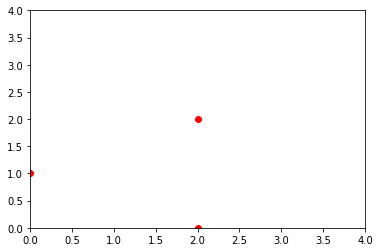

In [12]:
plt.plot(d1["x1"],d1["x2"],"ro")
plt.axis([0,4,0,4])
plt.show()

In [13]:
m1 = 'Original Plot'
m2 = 'MDS Plot'
m3 = 'PSO Plot'
def graph(d1,d2,m):
    x_val = d1["x1"].values
    y_val = d1["x2"].values
    link = d2.values.T
    plt.plot(x_val[link], y_val[link], 'g-') # Edges
    
    # low1, low2 specifies plot axis ranges
    low1 = 0 if d1["x1"].min()>0 else d1["x1"].min()-3
    low2 = 0 if d1["x2"].min()>0 else d1["x2"].min()-3
    plt.axis([low1,d1["x1"].max()+3,low2,d1["x2"].max()+3])
    
    plt.plot(d1["x1"],d1["x2"],'ro')
    plt.title(m)
    plt.savefig('./output/plot1.png', bbox_inches='tight')
    plt.show()
    #plt.savefig('plt1.png')

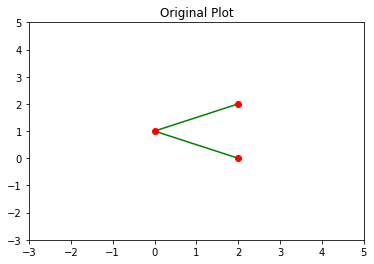

In [14]:
graph(d1,d2,m1)

## MDS

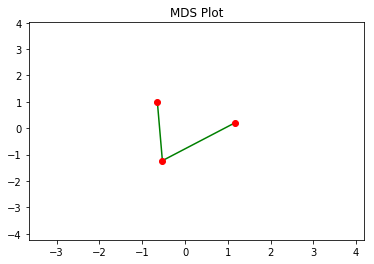

0.017191596432303002


In [15]:
mds = MDS(n_components=2)
dat = pd.DataFrame(mds.fit(d1).embedding_,columns=["x1","x2"])
graph(dat,d2,m2)
dij = euclidean_distances(d1.values, d1.values)
dis2 = euclidean_distances(dat.values, dat.values)
stress = (np.sum((dij-dis2)**2))**0.5   
print(stress)

On executing multiple times, we get different results which are basically just rotations of each other.

## PSO

In [17]:
!pip install pyswarm

  Running setup.py bdist_wheel for pyswarm: started
  Running setup.py bdist_wheel for pyswarm: finished with status 'done'
  Stored in directory: C:\Users\Bhavya\AppData\Local\pip\Cache\wheels\37\c5\f6\b33b9ac00040cb95c1f00af982a4197334a672d6de43f4699f
Successfully built pyswarm


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
from pyswarm import pso
from sklearn.metrics.pairwise import euclidean_distances
dij = euclidean_distances(d1.values, d1.values)
den = np.sum(dij**2)
def objective(x):
    twoD = np.reshape(x, (-1, 2))
    dis = euclidean_distances(twoD, twoD)
    #print(len(x),"   ",twoD.shape,"   ",dis.shape)
    #stress = (np.sum((dij-dis)**2)/den)**0.5   
    stress = (np.sum((dij-dis)**2))**0.5   
    #print(stress)
    return stress
    
lb = [0]*(len(d1)*2)
ub = [10]*(len(d1)*2)

xopt, fopt = pso(objective, lb, ub)
print("PSO Minimum Stress Value: ",fopt)

Stopping search: Swarm best objective change less than 1e-08
('PSO Minimum Stress Value: ', 3.170074456244094e-08)


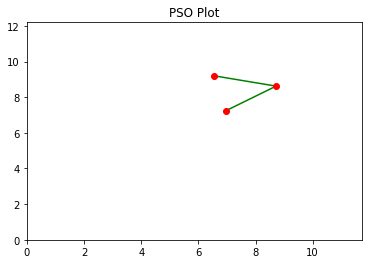

In [19]:
## Plot PSO Plot
x = xopt[0:][::2]
y = xopt[1:][::2]
newD = pd.DataFrame({"x1":x,"x2":y})
graph(newD,d2,m3)

In [28]:
pdist(d1.as_matrix())

C:\Users\Bhavya\Anaconda2\envs\genetic\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


array([2.23606798, 2.23606798, 2.        ])

In [21]:
## Objective 2: All pair hop distance
number_nodes = d1.shape[0]
mat = np.ndarray(shape=(number_nodes,number_nodes), dtype=float)


array([[0.01388889, 0.        , 0.        ],
       [0.        , 0.01388889, 0.        ],
       [0.        , 0.        , 1.        ]])